In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [18]:
# 用随机数种子保证随机数永远一致
np.random.seed(123)

In [19]:
credit_card_default = pd.read_csv('credit_card_default.csv')
credit_card_default

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


一共24列，其中23个特征，1列响应(True 或 False).我们想知道，能否在23 个特征中找出对机器学习流水线有帮助和有害的特征

In [20]:
credit_card_default.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [21]:
credit_card_default.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [22]:
X = credit_card_default.drop('default payment next month', axis=1)
y = credit_card_default['default payment next month']
y.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.model_selection import GridSearchCV

def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model, #要搜索的模型
                        params, #要尝试的参数
                        error_score=0.0) #如果报错，结果是0
    grid.fit(X, y) #拟合模型和参数
    #经典的性能指标
    print("Best Accuracy: {}".format(grid.best_score_))
    #得到最佳准确率的超参数
    print("Best Parameters: {}".format(grid.best_params_))
    #拟合的平均时间
    print("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    # 预测的平均时间（秒）
    # 从该指标可以看出模型在真实世界的性能
    print("Average Time to Score (s):{}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [28]:
# 为网格搜索设置变量
# 先设置机器学习模型的参数params

#逻辑回归
lr_params = {'C':[1e-1, 1e0, 1e1, 1e2], 'penalty':['l1', 'l2']}

#KNN
knn_params = {'n_neighbors':[1, 3, 5, 7]}

#决策树
tree_params = {'max_depth':[None, 1, 3, 5, 7]}

#随机森林
forest_params = {'n_estimators':[10, 50, 100], 'max_depth':[None, 1, 3, 5, 7]}

In [29]:
#实例化机器学习model
lr = LogisticRegression()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

In [16]:
#运行评估函数
#逻辑回归
get_best_model_and_accuracy(lr, lr_params, X, y)

Best Accuracy: 0.8096333333333333
Best Parameters: {'C': 0.1, 'penalty': 'l1'}
Average Time to Fit (s): 0.412
Average Time to Score (s):0.002


In [17]:
#knn:KNN 是按照欧几里得距离进行预测的，在非标准数据上可能会失效
get_best_model_and_accuracy(knn, knn_params, X, y)

Best Accuracy: 0.7602333333333333
Best Parameters: {'n_neighbors': 7}
Average Time to Fit (s): 0.028
Average Time to Score (s):0.739


In [18]:
#对于knn,需要更复杂的流水线
# 导入所需的包
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [19]:
# 为流水线设置KNN 参数
knn_pipe_params = {'classifier__{}'.format(k): v for k, v in knn_params.items()}
# KNN 需要标准化的参数
knn_pipe = Pipeline([('scale', StandardScaler()), ('classifier', knn)])

get_best_model_and_accuracy(knn_pipe, knn_pipe_params, X, y)

Best Accuracy: 0.8008
Best Parameters: {'classifier__n_neighbors': 7}
Average Time to Fit (s): 0.042
Average Time to Score (s):5.177


In [20]:
#决策树：又快又好
get_best_model_and_accuracy(d_tree, tree_params, X, y)

Best Accuracy: 0.8202666666666667
Best Parameters: {'max_depth': 3}
Average Time to Fit (s): 0.132
Average Time to Score (s):0.002


In [21]:
#随机森林
get_best_model_and_accuracy(forest, forest_params, X, y)

Best Accuracy: 0.8191
Best Parameters: {'max_depth': 7, 'n_estimators': 100}
Average Time to Fit (s): 0.863
Average Time to Score (s):0.042


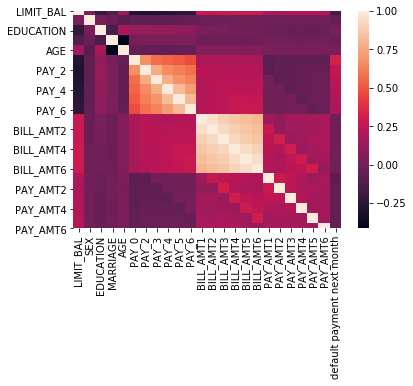

In [4]:
# 用Seaborn 生成热图查看每个特征的相关程度
sns.heatmap(credit_card_default.corr())

In [36]:
payment_next_month_corr = credit_card_default.corr()['default payment next month']
payment_next_month_corr

LIMIT_BAL                    -0.153520
SEX                          -0.039961
EDUCATION                     0.028006
MARRIAGE                     -0.024339
AGE                           0.013890
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
default payment next month    1.000000
Name: default payment next month, dtype: float64

In [9]:
#存储那些和响应的相关系数绝对值超过0.2的特征
abs(payment_next_month_corr) > 0.2

LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                          True
PAY_2                          True
PAY_3                          True
PAY_4                          True
PAY_5                          True
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month     True
Name: default payment next month, dtype: bool

In [16]:
sub_columns = credit_card_default.columns[abs(payment_next_month_corr) > 0.2]
sub = credit_card_default[sub_columns]
sub

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,default payment next month
0,2,2,-1,-1,-2,1
1,-1,2,0,0,0,1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0
...,...,...,...,...,...,...
29995,0,0,0,0,0,0
29996,-1,-1,-1,-1,0,0
29997,4,3,2,-1,0,1
29998,1,-1,0,0,0,1


In [30]:
X_subsetted = sub.drop('default payment next month', axis=1)
get_best_model_and_accuracy(d_tree, tree_params, X_subsetted, y)
# 比全体数据效果略差但是速度快了很多

Best Accuracy: 0.8196666666666667
Best Parameters: {'max_depth': 3}
Average Time to Fit (s): 0.008
Average Time to Score (s):0.001


In [32]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline
class CustomCorrelationChooser(TransformerMixin, BaseEstimator):
    def __init__(self, response, cols_to_keep=[], threshold=None):
        # 保存响应变量
        self.response = response
        # 保存阈值
        self.threshold = threshold
        # 初始化一个变量，存放要保留的特征名
        self.cols_to_keep = cols_to_keep
        
    def transform(self, X):
        # 转换会选择合适的列
        return X[self.cols_to_keep]
    
    def fit(self, X, *_):
        # 创建新的DataFrame，存放特征和响应
        df = pd.concat([X, self.response], axis=1)
        # 保存高于阈值的列的名称
        self.cols_to_keep = df.columns[df.corr()[df.columns[-1]].abs() >
    self.threshold]
        # 只保留X 的列，删掉响应变量
        self.cols_to_keep = [c for c in self.cols_to_keep if c in X.columns]
        return self

In [34]:
from copy import deepcopy
# 使用响应变量初始化特征选择器
ccc = CustomCorrelationChooser(response=y)
# 创建流水线，包括选择器
ccc_pipe = Pipeline([('correlation_select', ccc),
('classifier', d_tree)])
tree_pipe_params = {'classifier__max_depth':[None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}

# 复制决策树的参数
ccc_pipe_params = deepcopy(tree_pipe_params)
# 更新决策树的参数选择
ccc_pipe_params.update({'correlation_select__threshold':[0, .1, .2, .3]})
get_best_model_and_accuracy(ccc_pipe, ccc_pipe_params, X, y)

Best Accuracy: 0.8206
Best Parameters: {'classifier__max_depth': 5, 'correlation_select__threshold': 0.1}
Average Time to Fit (s): 0.096
Average Time to Score (s):0.003


In [3]:
#如果把阈值设为0.1，就足以消除噪声以提高准确性，并缩短拟合时间

In [5]:
tweets = pd.read_csv('twitter_sentiment.csv', encoding='latin1')
tweets

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


In [6]:
tweets_X, tweets_y = tweets['SentimentText'], tweets['Sentiment']

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

featurizer = CountVectorizer()
text_pipe = Pipeline([('featurizer', featurizer),
('classify', MultinomialNB())])

text_pipe_params = {'featurizer__ngram_range':[(1, 2)],
'featurizer__max_features': [5000, 10000],
'featurizer__min_df': [0., .1, .2, .3],
'featurizer__max_df': [.7, .8, .9, 1.]}

In [12]:
get_best_model_and_accuracy(text_pipe, text_pipe_params, tweets_X, tweets_y)

Best Accuracy: 0.7557531328446129
Best Parameters: {'featurizer__max_df': 0.7, 'featurizer__max_features': 10000, 'featurizer__min_df': 0.0, 'featurizer__ngram_range': (1, 2)}
Average Time to Fit (s): 2.454
Average Time to Score (s):0.414


In [13]:
#特征选择指标——针对基于树的模型

In [20]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
select_from_model = SelectFromModel(DecisionTreeClassifier(),
threshold=.05) # 默认阈值是针对gini index

In [22]:
X = credit_card_default.drop('default payment next month', axis=1)
y = credit_card_default['default payment next month']

selected_X = select_from_model.fit_transform(X, y)
selected_X

array([[ 20000,     24,      2, ...,   3102,    689,      0],
       [120000,     26,     -1, ...,   1725,   1000,   1000],
       [ 90000,     34,      0, ...,  14027,   1500,   1000],
       ...,
       [ 30000,     37,      4, ...,   3356,      0,  22000],
       [ 80000,     41,      1, ...,  78379,   3409,   1178],
       [ 50000,     46,      0, ...,  48905,   1800,   1430]], dtype=int64)

In [24]:
# 为后面加速
tree_pipe_params = {'classifier__max_depth': [1, 3, 5, 7]}
from sklearn.pipeline import Pipeline
from copy import deepcopy
# 创建基于DecisionTreeClassifier 的SelectFromModel
select = SelectFromModel(DecisionTreeClassifier())
d_tree = DecisionTreeClassifier()
select_from_pipe = Pipeline([('select', select), ('classifier', d_tree)])
select_from_pipe_params = deepcopy(tree_pipe_params)
select_from_pipe_params.update({
'select__threshold': [.01, .05, .1, .2, .25, .3, .4, .5, .6, "mean", "median",
"2.*mean"],
'select__estimator__max_depth': [None, 1, 3, 5, 7]
})

In [25]:
get_best_model_and_accuracy(select_from_pipe, select_from_pipe_params, X, y)

Best Accuracy: 0.8202666666666667
Best Parameters: {'classifier__max_depth': 3, 'select__estimator__max_depth': None, 'select__threshold': 0.01}
Average Time to Fit (s): 0.144
Average Time to Score (s):0.001
